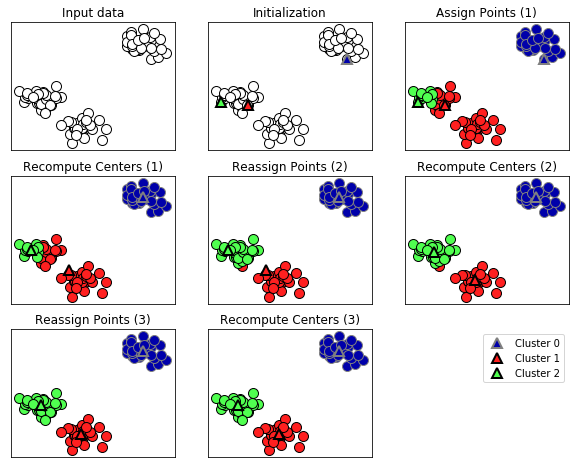

In [4]:
# library import
import mglearn
import matplotlib
import matplotlib.pyplot as plt

# matplotlib 설정

matplotlib.rc('font', family='AppleGothic') # 한글 출력
plt.rcParams['axes.unicode_minus'] = False #  축 -
mglearn.plots.plot_kmeans_algorithm()
plt.show()

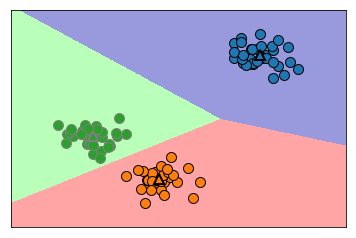

In [22]:
mglearn.plots.plot_kmeans_boundaries()
plt.show() 

In [5]:
# library import
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# 데이터 만들기
x, y = make_blobs(random_state=1)

# 모델 생성 및 학습
kmean = KMeans(n_clusters=3) # 클러스터 수
kmean.fit(x)
#kmean.labels_ : 어느 클러스터에 속하는지 알려줌
print('클러스터 레이블: \n{}'.format(kmean.labels_)) 

#3개의 클러스터를 지정했으므로 각 클러스터는 0 ~ 2까지 번호가 붙음
### predict메소드를 통해 새로운 데이터 클러스터 레이블을 예측할 수 있음
### 예측은 각 포인트에 가장 가까운 클러스터 영역으로 할당하는 것이며 기존 모델을 변경하지 않음
### 훈련 세트에 대해 predict 메소드를 실행하면 labels_와 같은 결과를 얻게 됨

print('예측 레이블: \n{}'.format(kmean.predict(x)))

### 클러스터는 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 비슷함
### 그러나 정답을 모르고 있으며 레이블 자체에 의미가 없음
### 알고리즘이 우리에게 주는 정보는 각 레이블에 속한 데이터는 서로 비슷하다는 것

클러스터 레이블: 
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
예측 레이블: 
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


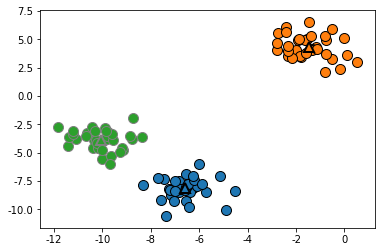

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

In [35]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmean.labels_, markers= 'o') # x, y, group, marker

mglearn.discrete_scatter(

    kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], y=np.unique(kmean.labels_),# x, y, group

    markers='^', markeredgewidth=2) # marker, 두께

plt.show()

# 3. 클러스터수를 변경하여 비교

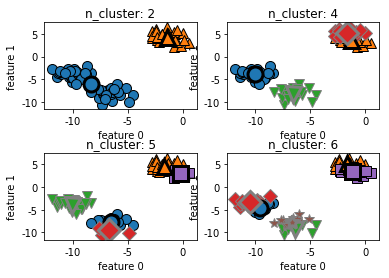

In [6]:
fig, axes = plt.subplots(2, 2, gridspec_kw={'hspace':0.5}) # gridspec_kw: 그래프 수평간격

n_clusters_set = [2, 4, 5, 6] 

for n, ax in zip(n_clusters_set, axes.ravel()):

    kmeans = KMeans(n_clusters=n) # 클러스터 갯수

    kmeans.fit(x)

    mglearn.discrete_scatter(x[:, 0], x[:, 1], y=kmeans.labels_, ax=ax) # x, y, group, ax = plot객체

    mglearn.discrete_scatter(

        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], y=np.unique(kmeans.labels_), # x, y, group

        markeredgewidth=3, ax=ax, s=15) # 두께, 그림객체, 사이즈

    ax.set_title('n_cluster: {}'.format(n)) # title

    ax.set_xlabel('feature 0')

    ax.set_ylabel('feature 1')

plt.show()

# 4. k-평균 알고리즘이 실패하는 경우

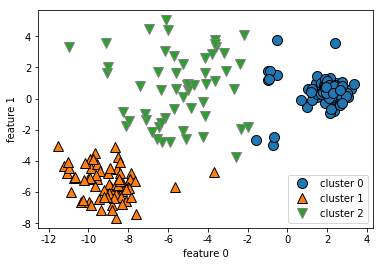

In [46]:
#4-1 클러스터의 밀도가 다를 때

x1, y1 = make_blobs(n_samples=200, cluster_std=[1, 2.5, 0.5], random_state=170) # 샘플수, 밀도, 랜덤상태

y_pred = KMeans(n_clusters=3, random_state=0,).fit_predict(x1) # 모델 생성 및 훈련 후 예측



mglearn.discrete_scatter(x1[:, 0], x1[:, 1], y=y_pred) # x, y, group

plt.legend(['cluster 0', 'cluster 1', 'cluster 2']) # 범례

plt.xlabel('feature 0')

plt.ylabel('feature 1')

plt.show()

[[ 0.60834549 -0.63667341]
 [-0.40887718  0.85253229]]


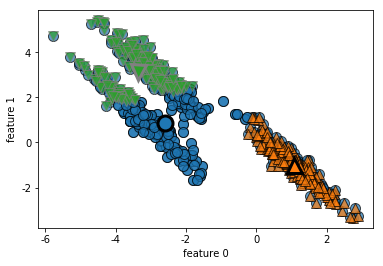

In [7]:
#4-2 클러스터가 원형이 아닐  때

x2, y2 = make_blobs(n_samples=600, random_state=170) # 샘플 갯수, 램덤상태
# mglearn.discrete_scatter(x2[:, 0], x2[:, 1], alpha=0.7) # x, y , group, 투명도
# rng = np.random.RandomState(74).normal(size=(2,2)) # 랜덤상태, (2,2)size로 normal분포의 숫자 무작위추출
rng = np.random.RandomState(74).normal(size=(2,2)) # 랜덤상태, (2,2)size로 normal분포의 숫자 무작위추출
print(rng)
x2_reshape = np.dot(x2, rng) # np.dot 행렬곱



kmeans = KMeans(n_clusters=3).fit(x2_reshape) # 모델 생성

y2_pred = kmeans.predict(x2_reshape) # 예측
mglearn.discrete_scatter(x2_reshape[:, 0], x2_reshape[:, 1], alpha=0.7)


mglearn.discrete_scatter(x2_reshape[:, 0], x2_reshape[:, 1], y=kmeans.labels_, alpha=0.7) # x, y , group, 투명도

mglearn.discrete_scatter(

    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], y=np.unique(kmeans.labels_), # x, y, group

    markeredgewidth=3, s=15) # 두께, size

plt.xlabel('feature 0')

plt.ylabel('feature 1')

plt.show()